In [19]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [20]:
# read annual conflict intensities
conflict_intensity_2020_gdf = gpd.read_file("data/output/conflict_intensity_2020.shp")
conflict_intensity_2021_gdf = gpd.read_file("data/output/conflict_intensity_2021.shp")
conflict_intensity_2022_gdf = gpd.read_file("data/output/conflict_intensity_2022.shp")
conflict_intensity_2023_gdf = gpd.read_file("data/output/conflict_intensity_2023.shp")
conflict_intensity_2024_gdf = gpd.read_file("data/output/conflict_intensity_2024.shp")

In [21]:
conflict_df = pd.read_csv("conflict_intensity.csv")
conflict_df

,Unnamed: 0,tile_id,year,conflict_intensity
0,0,93946_1313825,2020,0.000000
1,1,93946_1338825,2020,0.000000
2,2,93946_1363825,2020,0.000000
3,3,93946_1388825,2020,0.000000
4,4,118946_1313825,2020,0.000000
...,...,...,...,...
1935,1935,593946_1313825,2024,0.140468
1936,1936,593946_1338825,2024,0.000000
1937,1937,593946_1413825,2024,0.000000
1938,1938,593946_1438825,2024,0.000000


Bin edges: [4.04186603e-02 1.94552778e+01 3.88701370e+01 5.82849962e+01
 7.76998553e+01 9.71147145e+01 1.16529574e+02 1.35944433e+02
 1.55359292e+02 1.74774151e+02 1.94189010e+02 2.13603870e+02
 2.33018729e+02 2.52433588e+02 2.71848447e+02 2.91263306e+02
 3.10678165e+02 3.30093025e+02 3.49507884e+02 3.68922743e+02
 3.88337602e+02 4.07752461e+02 4.27167320e+02 4.46582180e+02
 4.65997039e+02 4.85411898e+02]
Number of bins: 25
Non-zero value range: 0.0404 to 485.4119
Number of non-zero tiles: 731
Number of zero tiles: 1209

Distribution statistics:
Mean: 4.2050
Median: 1.1250
75th percentile: 3.5570
90th percentile: 8.9451
95th percentile: 14.4540
99th percentile: 35.0444


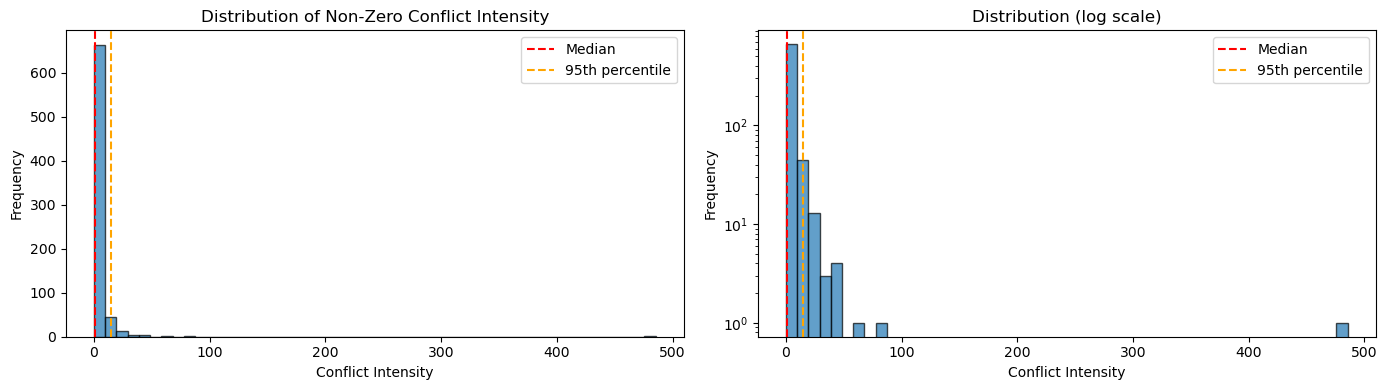

In [22]:
# Calculate bin bounds from histogram with 25 bins (ignoring zeros)
conflict_values = conflict_df['conflict_intensity'].values
non_zero_values = conflict_values[conflict_values > 0]
hist, bin_edges = np.histogram(non_zero_values, bins=25)

print(f"Bin edges: {bin_edges}")
print(f"Number of bins: {len(bin_edges)-1}")
print(f"Non-zero value range: {non_zero_values.min():.4f} to {non_zero_values.max():.4f}")
print(f"Number of non-zero tiles: {len(non_zero_values)}")
print(f"Number of zero tiles: {len(conflict_values) - len(non_zero_values)}")
print(f"\nDistribution statistics:")
print(f"Mean: {non_zero_values.mean():.4f}")
print(f"Median: {np.median(non_zero_values):.4f}")
print(f"75th percentile: {np.percentile(non_zero_values, 75):.4f}")
print(f"90th percentile: {np.percentile(non_zero_values, 90):.4f}")
print(f"95th percentile: {np.percentile(non_zero_values, 95):.4f}")
print(f"99th percentile: {np.percentile(non_zero_values, 99):.4f}")

# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Regular histogram
axes[0].hist(non_zero_values, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Conflict Intensity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Non-Zero Conflict Intensity')
axes[0].axvline(np.median(non_zero_values), color='red', linestyle='--', label='Median')
axes[0].axvline(np.percentile(non_zero_values, 95), color='orange', linestyle='--', label='95th percentile')
axes[0].legend()

# Log-scale histogram
axes[1].hist(non_zero_values, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Conflict Intensity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution (log scale)')
axes[1].set_yscale('log')
axes[1].axvline(np.median(non_zero_values), color='red', linestyle='--', label='Median')
axes[1].axvline(np.percentile(non_zero_values, 95), color='orange', linestyle='--', label='95th percentile')
axes[1].legend()

plt.tight_layout()
plt.show()

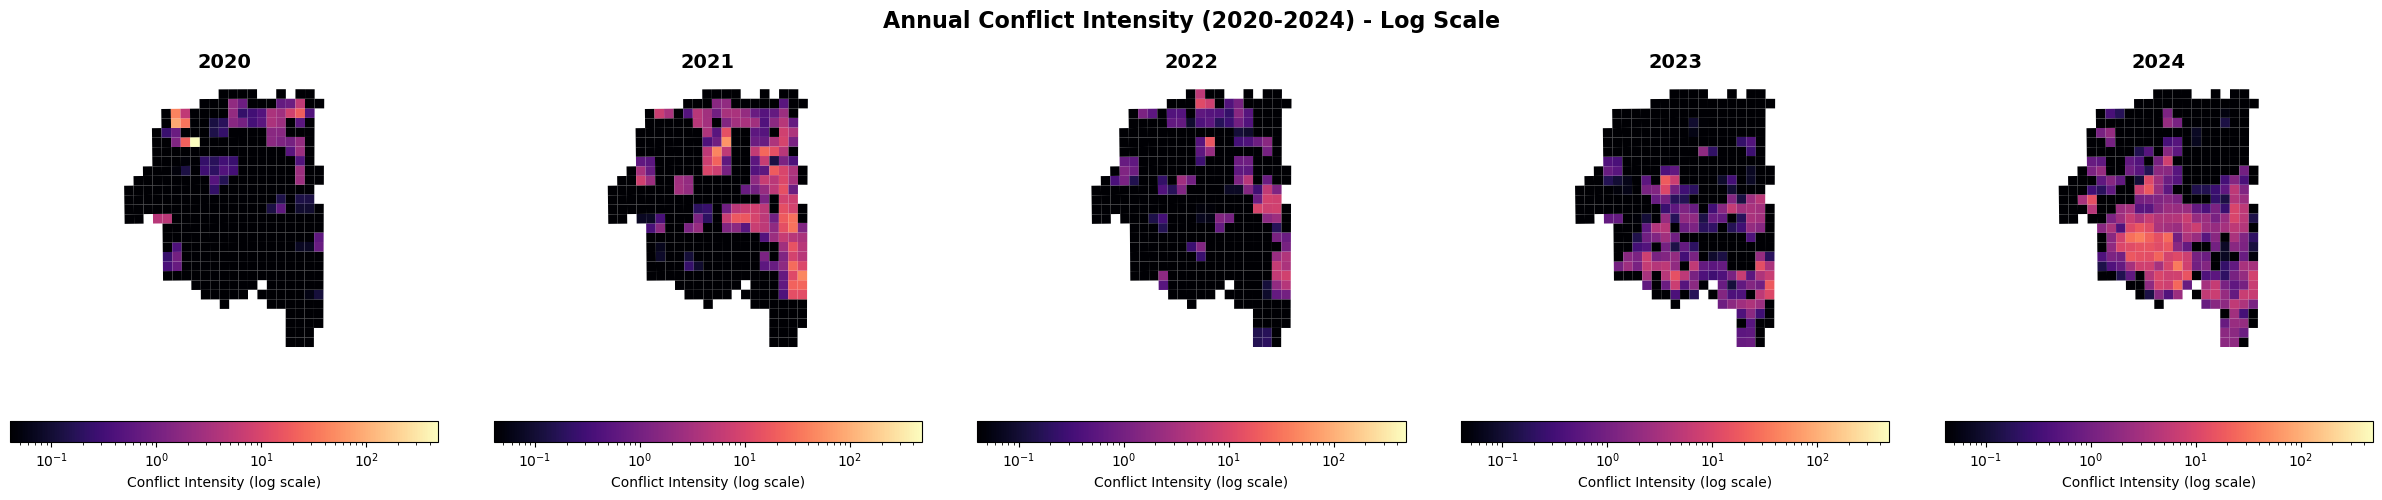

In [23]:
# log scale visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

gdfs = [
    conflict_intensity_2020_gdf,
    conflict_intensity_2021_gdf,
    conflict_intensity_2022_gdf,
    conflict_intensity_2023_gdf,
    conflict_intensity_2024_gdf
]
years = [2020, 2021, 2022, 2023, 2024]

# need to handle zeros for log scale
vmin_log = non_zero_values.min()
vmax_log = non_zero_values.max()

for ax, gdf, year in zip(axes, gdfs, years):
    # create a copy with small value for zeros (for log scale)
    gdf_plot = gdf.copy()
    gdf_plot.loc[gdf_plot['conflict_i'] == 0, 'conflict_i'] = vmin_log / 10
    
    gdf_plot.plot(
        column='conflict_i',
        cmap='magma',
        ax=ax,
        legend=True,
        norm=LogNorm(vmin=vmin_log, vmax=vmax_log),
        edgecolor='none',
        legend_kwds={
            'label': 'Conflict Intensity (log scale)',
            'orientation': 'horizontal', 'shrink': 0.8
        }
    )
    ax.set_title(f'{year}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.suptitle('Annual Conflict Intensity (2020-2024) - Log Scale', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('figs/conflict_intensity_annual_log.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
conflict_and_crop_df = pd.read_csv("conflict_and_crop.csv")

In [39]:
conflict_and_crop_df

,Unnamed: 0.1,Unnamed: 0,tile_id,year,conflict_intensity,crop_change_ha,crop_change_pct
0,0,0,93946_1313825,2020,0.000000,-1425.711922,-92.798302
1,1,1,93946_1338825,2020,0.000000,-3042.316431,-99.373184
2,2,2,93946_1363825,2020,0.000000,-1662.913922,-98.805714
3,3,3,93946_1388825,2020,0.000000,-1250.843216,-98.646493
4,6,6,118946_1363825,2020,0.000000,-1290.511176,-98.674916
...,...,...,...,...,...,...,...
1860,1933,1933,593946_1263825,2024,0.203867,-3350.087059,-17.456936
1861,1934,1934,593946_1288825,2024,0.000000,501.048392,3.019707
1862,1935,1935,593946_1313825,2024,0.140468,4091.916941,16.556408
1863,1936,1936,593946_1338825,2024,0.000000,5846.576196,32.262850


In [26]:
# ===========================
# CROP COVER CHANGE VISUALIZATIONS
# ===========================

# Get geometry from conflict_intensity_gdf
base_gdf = conflict_intensity_2020_gdf[['tile_id', 'geometry']].copy()

# Create geodataframes for each year by merging crop change data with geometries
crop_change_2020_gdf = base_gdf.merge(
    conflict_and_crop_df[conflict_and_crop_df['year'] == 2020][['tile_id', 'crop_change_ha', 'crop_change_pct']], 
    on='tile_id', 
    how='inner'
)
crop_change_2021_gdf = base_gdf.merge(
    conflict_and_crop_df[conflict_and_crop_df['year'] == 2021][['tile_id', 'crop_change_ha', 'crop_change_pct']], 
    on='tile_id', 
    how='inner'
)
crop_change_2022_gdf = base_gdf.merge(
    conflict_and_crop_df[conflict_and_crop_df['year'] == 2022][['tile_id', 'crop_change_ha', 'crop_change_pct']], 
    on='tile_id', 
    how='inner'
)
crop_change_2023_gdf = base_gdf.merge(
    conflict_and_crop_df[conflict_and_crop_df['year'] == 2023][['tile_id', 'crop_change_ha', 'crop_change_pct']], 
    on='tile_id', 
    how='inner'
)
crop_change_2024_gdf = base_gdf.merge(
    conflict_and_crop_df[conflict_and_crop_df['year'] == 2024][['tile_id', 'crop_change_ha', 'crop_change_pct']], 
    on='tile_id', 
    how='inner'
)

print(f"GeoDataFrames created:")
print(f"2020: {len(crop_change_2020_gdf)} tiles")
print(f"2021: {len(crop_change_2021_gdf)} tiles")
print(f"2022: {len(crop_change_2022_gdf)} tiles")
print(f"2023: {len(crop_change_2023_gdf)} tiles")
print(f"2024: {len(crop_change_2024_gdf)} tiles")

GeoDataFrames created:
2020: 373 tiles
2021: 373 tiles
2022: 373 tiles
2023: 373 tiles
2024: 373 tiles


Crop change distribution statistics (ha):
Value range: -17023.90 to 7761.43 ha
Mean: -318.12 ha
Median: -76.76 ha
Standard deviation: 2631.13 ha
25th percentile: -1515.86 ha
75th percentile: 1151.00 ha
5th percentile: -4767.53 ha
95th percentile: 3510.81 ha


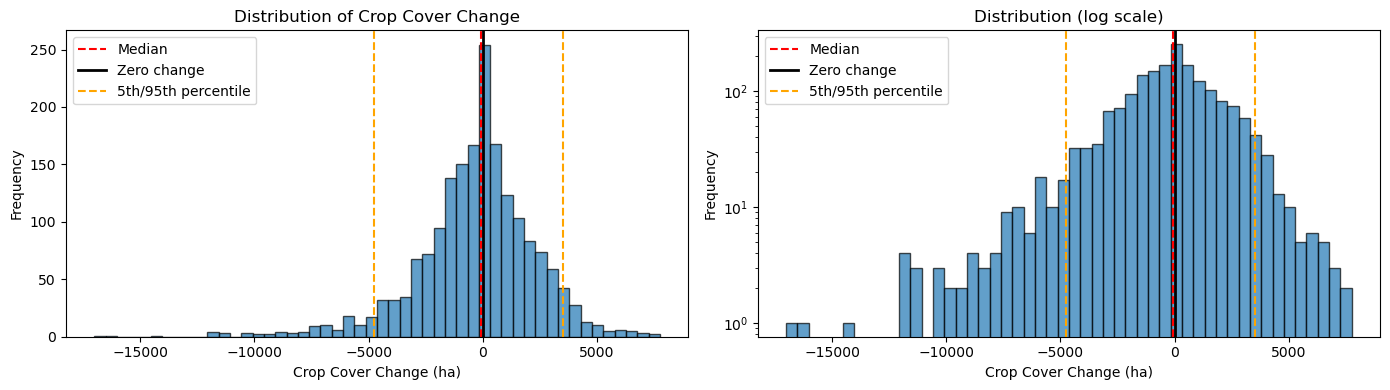

In [41]:
# Analyze crop change distribution
crop_change_values = conflict_and_crop_df['crop_change_ha'].values

print(f"Crop change distribution statistics (ha):")
print(f"Value range: {crop_change_values.min():.2f} to {crop_change_values.max():.2f} ha")
print(f"Mean: {crop_change_values.mean():.2f} ha")
print(f"Median: {np.median(crop_change_values):.2f} ha")
print(f"Standard deviation: {np.std(crop_change_values):.2f} ha")
print(f"25th percentile: {np.percentile(crop_change_values, 25):.2f} ha")
print(f"75th percentile: {np.percentile(crop_change_values, 75):.2f} ha")
print(f"5th percentile: {np.percentile(crop_change_values, 5):.2f} ha")
print(f"95th percentile: {np.percentile(crop_change_values, 95):.2f} ha")

# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Regular histogram
axes[0].hist(crop_change_values, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Crop Cover Change (ha)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Crop Cover Change')
axes[0].axvline(np.median(crop_change_values), color='red', linestyle='--', label='Median')
axes[0].axvline(0, color='black', linestyle='-', linewidth=2, label='Zero change')
axes[0].axvline(np.percentile(crop_change_values, 5), color='orange', linestyle='--', label='5th/95th percentile')
axes[0].axvline(np.percentile(crop_change_values, 95), color='orange', linestyle='--')
axes[0].legend()

# Log-scale histogram
axes[1].hist(crop_change_values, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Crop Cover Change (ha)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution (log scale)')
axes[1].set_yscale('log')
axes[1].axvline(np.median(crop_change_values), color='red', linestyle='--', label='Median')
axes[1].axvline(0, color='black', linestyle='-', linewidth=2, label='Zero change')
axes[1].axvline(np.percentile(crop_change_values, 5), color='orange', linestyle='--', label='5th/95th percentile')
axes[1].axvline(np.percentile(crop_change_values, 95), color='orange', linestyle='--')
axes[1].legend()

plt.tight_layout()
plt.show()

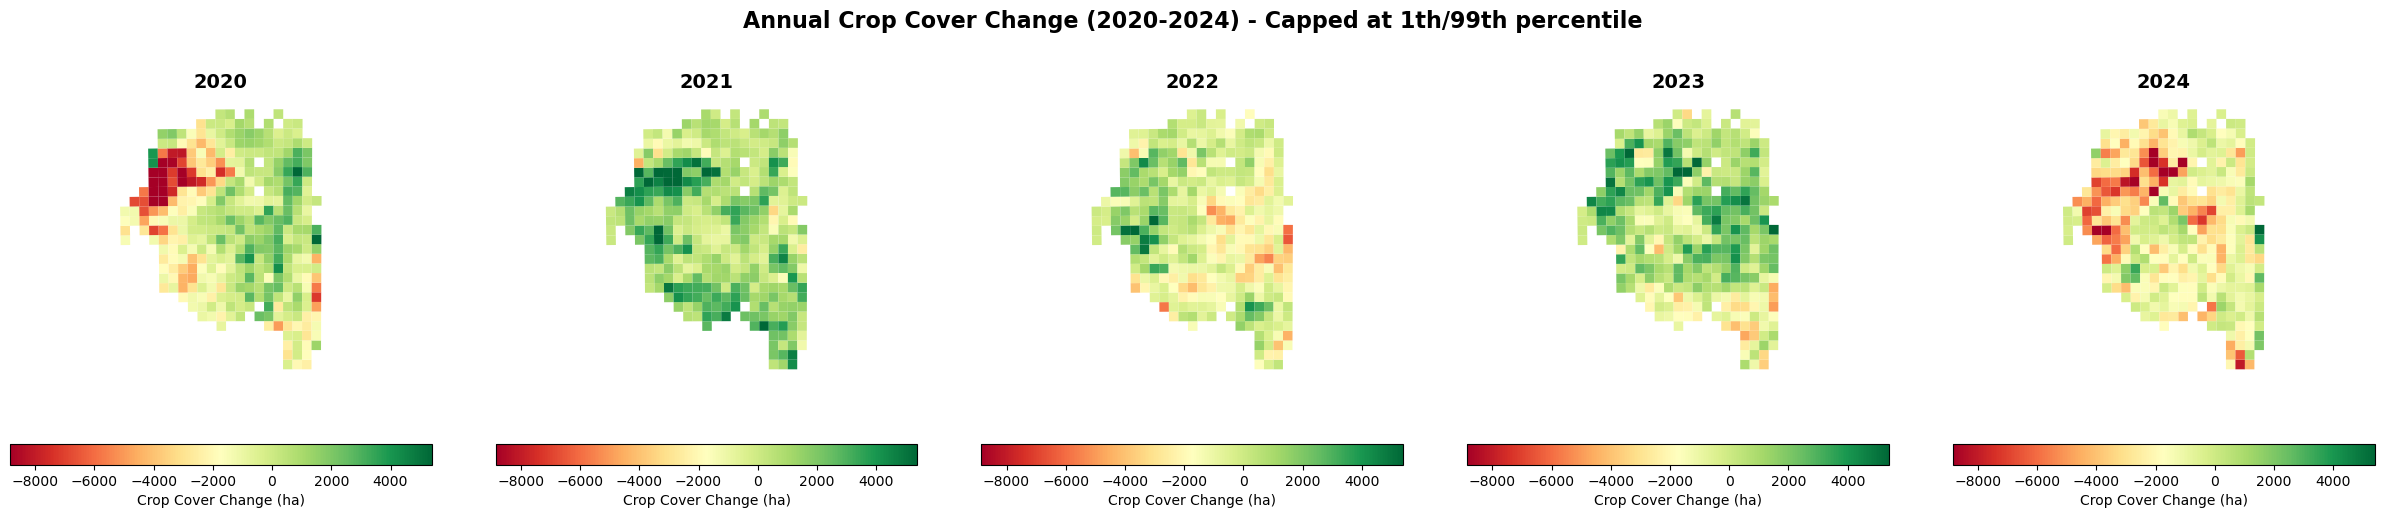

In [45]:
# Visualize crop cover change (ha)

percentile_cap = 1  # Use 1st and 99th percentiles
vmin_crop = np.percentile(crop_change_values, percentile_cap)
vmax_crop = np.percentile(crop_change_values, 100 - percentile_cap)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

gdfs_crop = [
    crop_change_2020_gdf,
    crop_change_2021_gdf,
    crop_change_2022_gdf,
    crop_change_2023_gdf,
    crop_change_2024_gdf
]
years = [2020, 2021, 2022, 2023, 2024]

for ax, gdf, year in zip(axes, gdfs_crop, years):
    gdf.plot(
        column='crop_change_ha',
        cmap='RdYlGn',
        ax=ax,
        legend=True,
        vmin=vmin_crop,
        vmax=vmax_crop,
        edgecolor='none',
        legend_kwds={
            'label': 'Crop Cover Change (ha)',
            'orientation': 'horizontal',
            'shrink': 0.8
        }
    )
    ax.set_title(f'{year}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.suptitle(f'Annual Crop Cover Change (2020-2024) - Capped at {percentile_cap}th/{100-percentile_cap}th percentile', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f'figs/crop_change_annual_capped_{percentile_cap}pct.png', dpi=300, bbox_inches='tight')
plt.show()

Crop change percentage distribution statistics:
Value range: -99.80% to 2821.45%
Mean: 5.68%
Median: -0.41%
Standard deviation: 108.30%
25th percentile: -8.66%
75th percentile: 8.18%
5th percentile: -47.95%
95th percentile: 47.40%


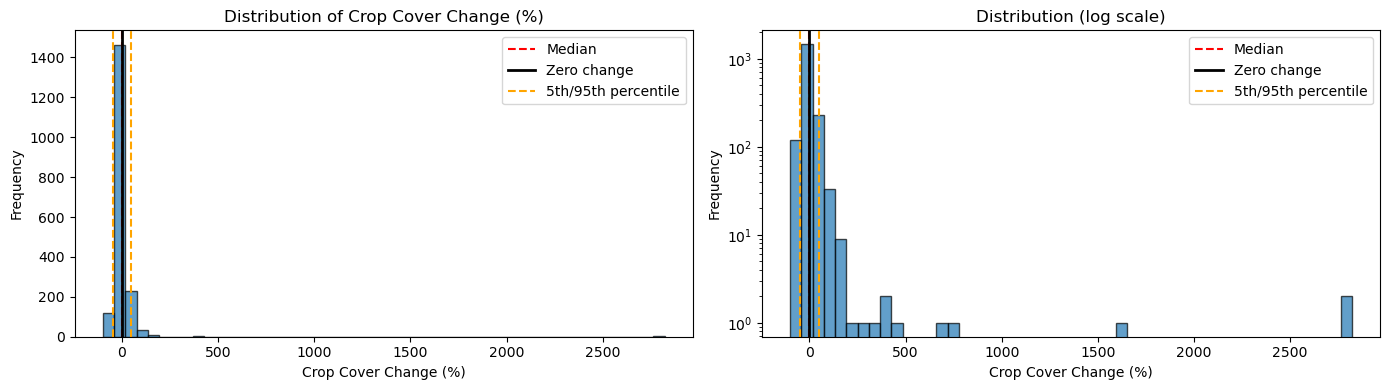

In [43]:
# Visualize crop change PERCENTAGE distribution
crop_change_pct_values = conflict_and_crop_df['crop_change_pct'].values

print(f"Crop change percentage distribution statistics:")
print(f"Value range: {crop_change_pct_values.min():.2f}% to {crop_change_pct_values.max():.2f}%")
print(f"Mean: {crop_change_pct_values.mean():.2f}%")
print(f"Median: {np.median(crop_change_pct_values):.2f}%")
print(f"Standard deviation: {np.std(crop_change_pct_values):.2f}%")
print(f"25th percentile: {np.percentile(crop_change_pct_values, 25):.2f}%")
print(f"75th percentile: {np.percentile(crop_change_pct_values, 75):.2f}%")
print(f"5th percentile: {np.percentile(crop_change_pct_values, 5):.2f}%")
print(f"95th percentile: {np.percentile(crop_change_pct_values, 95):.2f}%")

# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Regular histogram
axes[0].hist(crop_change_pct_values, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Crop Cover Change (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Crop Cover Change (%)')
axes[0].axvline(np.median(crop_change_pct_values), color='red', linestyle='--', label='Median')
axes[0].axvline(0, color='black', linestyle='-', linewidth=2, label='Zero change')
axes[0].axvline(np.percentile(crop_change_pct_values, 5), color='orange', linestyle='--', label='5th/95th percentile')
axes[0].axvline(np.percentile(crop_change_pct_values, 95), color='orange', linestyle='--')
axes[0].legend()

# Log-scale histogram
axes[1].hist(crop_change_pct_values, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Crop Cover Change (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution (log scale)')
axes[1].set_yscale('log')
axes[1].axvline(np.median(crop_change_pct_values), color='red', linestyle='--', label='Median')
axes[1].axvline(0, color='black', linestyle='-', linewidth=2, label='Zero change')
axes[1].axvline(np.percentile(crop_change_pct_values, 5), color='orange', linestyle='--', label='5th/95th percentile')
axes[1].axvline(np.percentile(crop_change_pct_values, 95), color='orange', linestyle='--')
axes[1].legend()

plt.tight_layout()
plt.show()

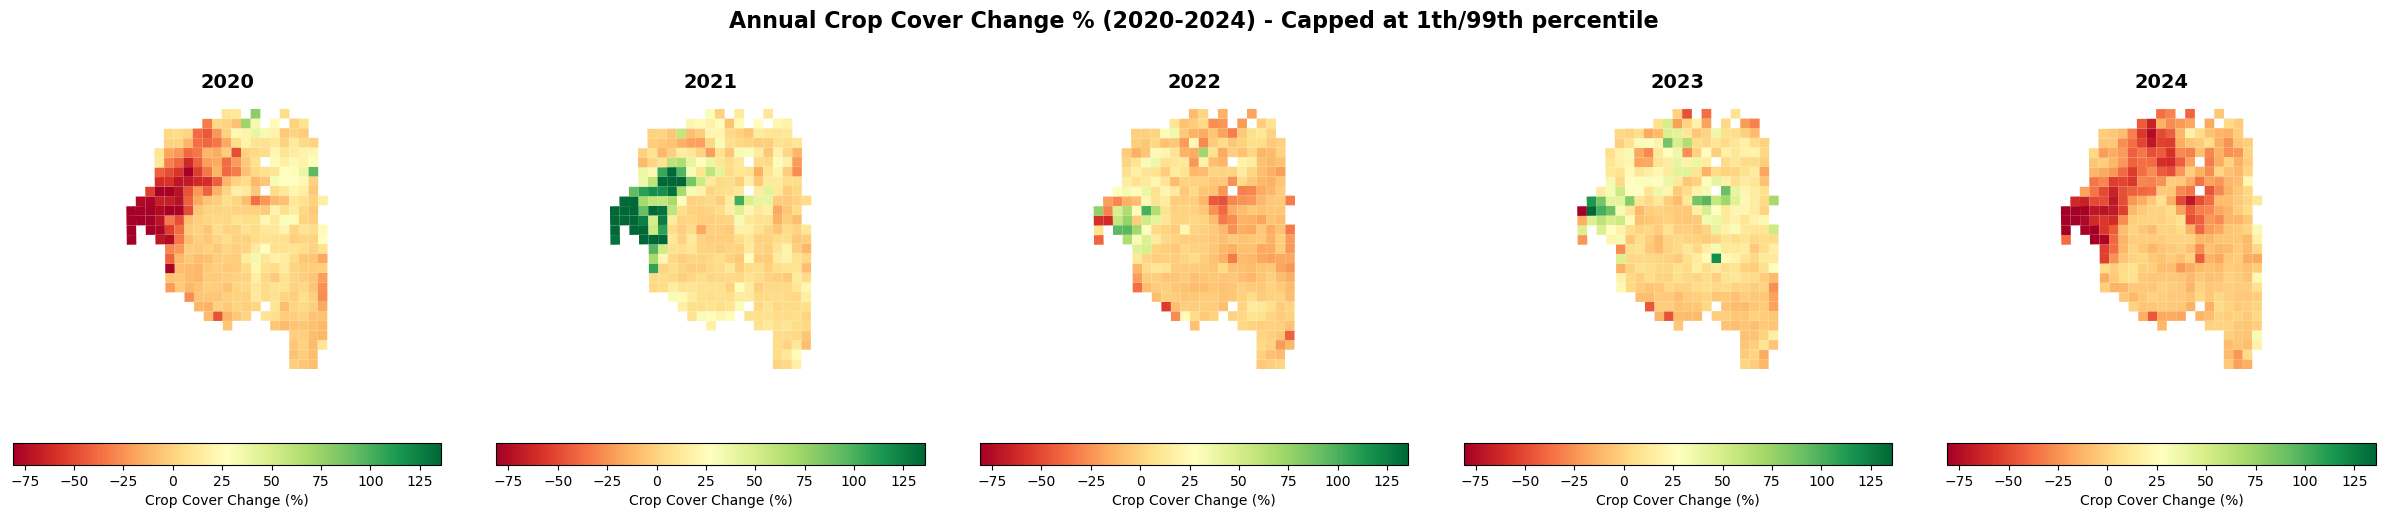

In [44]:
# Crop change PERCENTAGE visualization with percentile capping
percentile_cap = 1
vmin_crop_pct = np.percentile(crop_change_pct_values, percentile_cap)
vmax_crop_pct = np.percentile(crop_change_pct_values, 100 - percentile_cap)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

gdfs_crop = [
    crop_change_2020_gdf,
    crop_change_2021_gdf,
    crop_change_2022_gdf,
    crop_change_2023_gdf,
    crop_change_2024_gdf
]
years = [2020, 2021, 2022, 2023, 2024]

for ax, gdf, year in zip(axes, gdfs_crop, years):
    gdf.plot(
        column='crop_change_pct',
        cmap='RdYlGn',
        ax=ax,
        legend=True,
        vmin=vmin_crop_pct,
        vmax=vmax_crop_pct,
        edgecolor='none',
        legend_kwds={
            'label': 'Crop Cover Change (%)',
            'orientation': 'horizontal',
            'shrink': 0.8
        }
    )
    ax.set_title(f'{year}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.suptitle(f'Annual Crop Cover Change % (2020-2024) - Capped at {percentile_cap}th/{100-percentile_cap}th percentile', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f'figs/crop_change_pct_annual_capped_{percentile_cap}pct.png', dpi=300, bbox_inches='tight')
plt.show()